In [155]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [156]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [157]:
# Load the dataset
data = pd.read_csv('tips (data for regression problem).csv')

In [158]:
# Display the first few rows of the dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [160]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [161]:
# Check for missing values  
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [162]:
data.duplicated().sum()

1

In [163]:
duplicates = data[data.duplicated(keep=False)]
print(duplicates)

     total_bill  tip     sex smoker   day   time  size
198        13.0  2.0  Female    Yes  Thur  Lunch     2
202        13.0  2.0  Female    Yes  Thur  Lunch     2


In [164]:
data.drop_duplicates(inplace= True)

In [165]:
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [166]:
print("Encoded Data:\n")
data.head()

Encoded Data:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


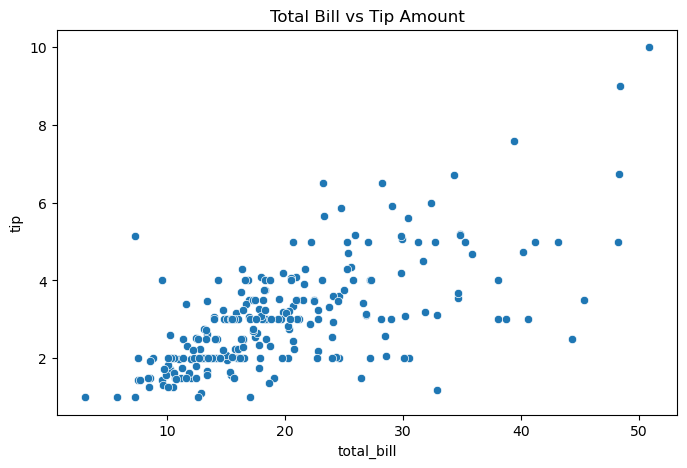

In [167]:
# Scatter plot for bill amount vs tip amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title('Total Bill vs Tip Amount')
plt.show()

The scatter plot indicates a positive relationship between 'total_bill' and 'tip'. Higher total bills tend to result in higher tips, suggesting a linear relationship

<Figure size 1000x800 with 0 Axes>

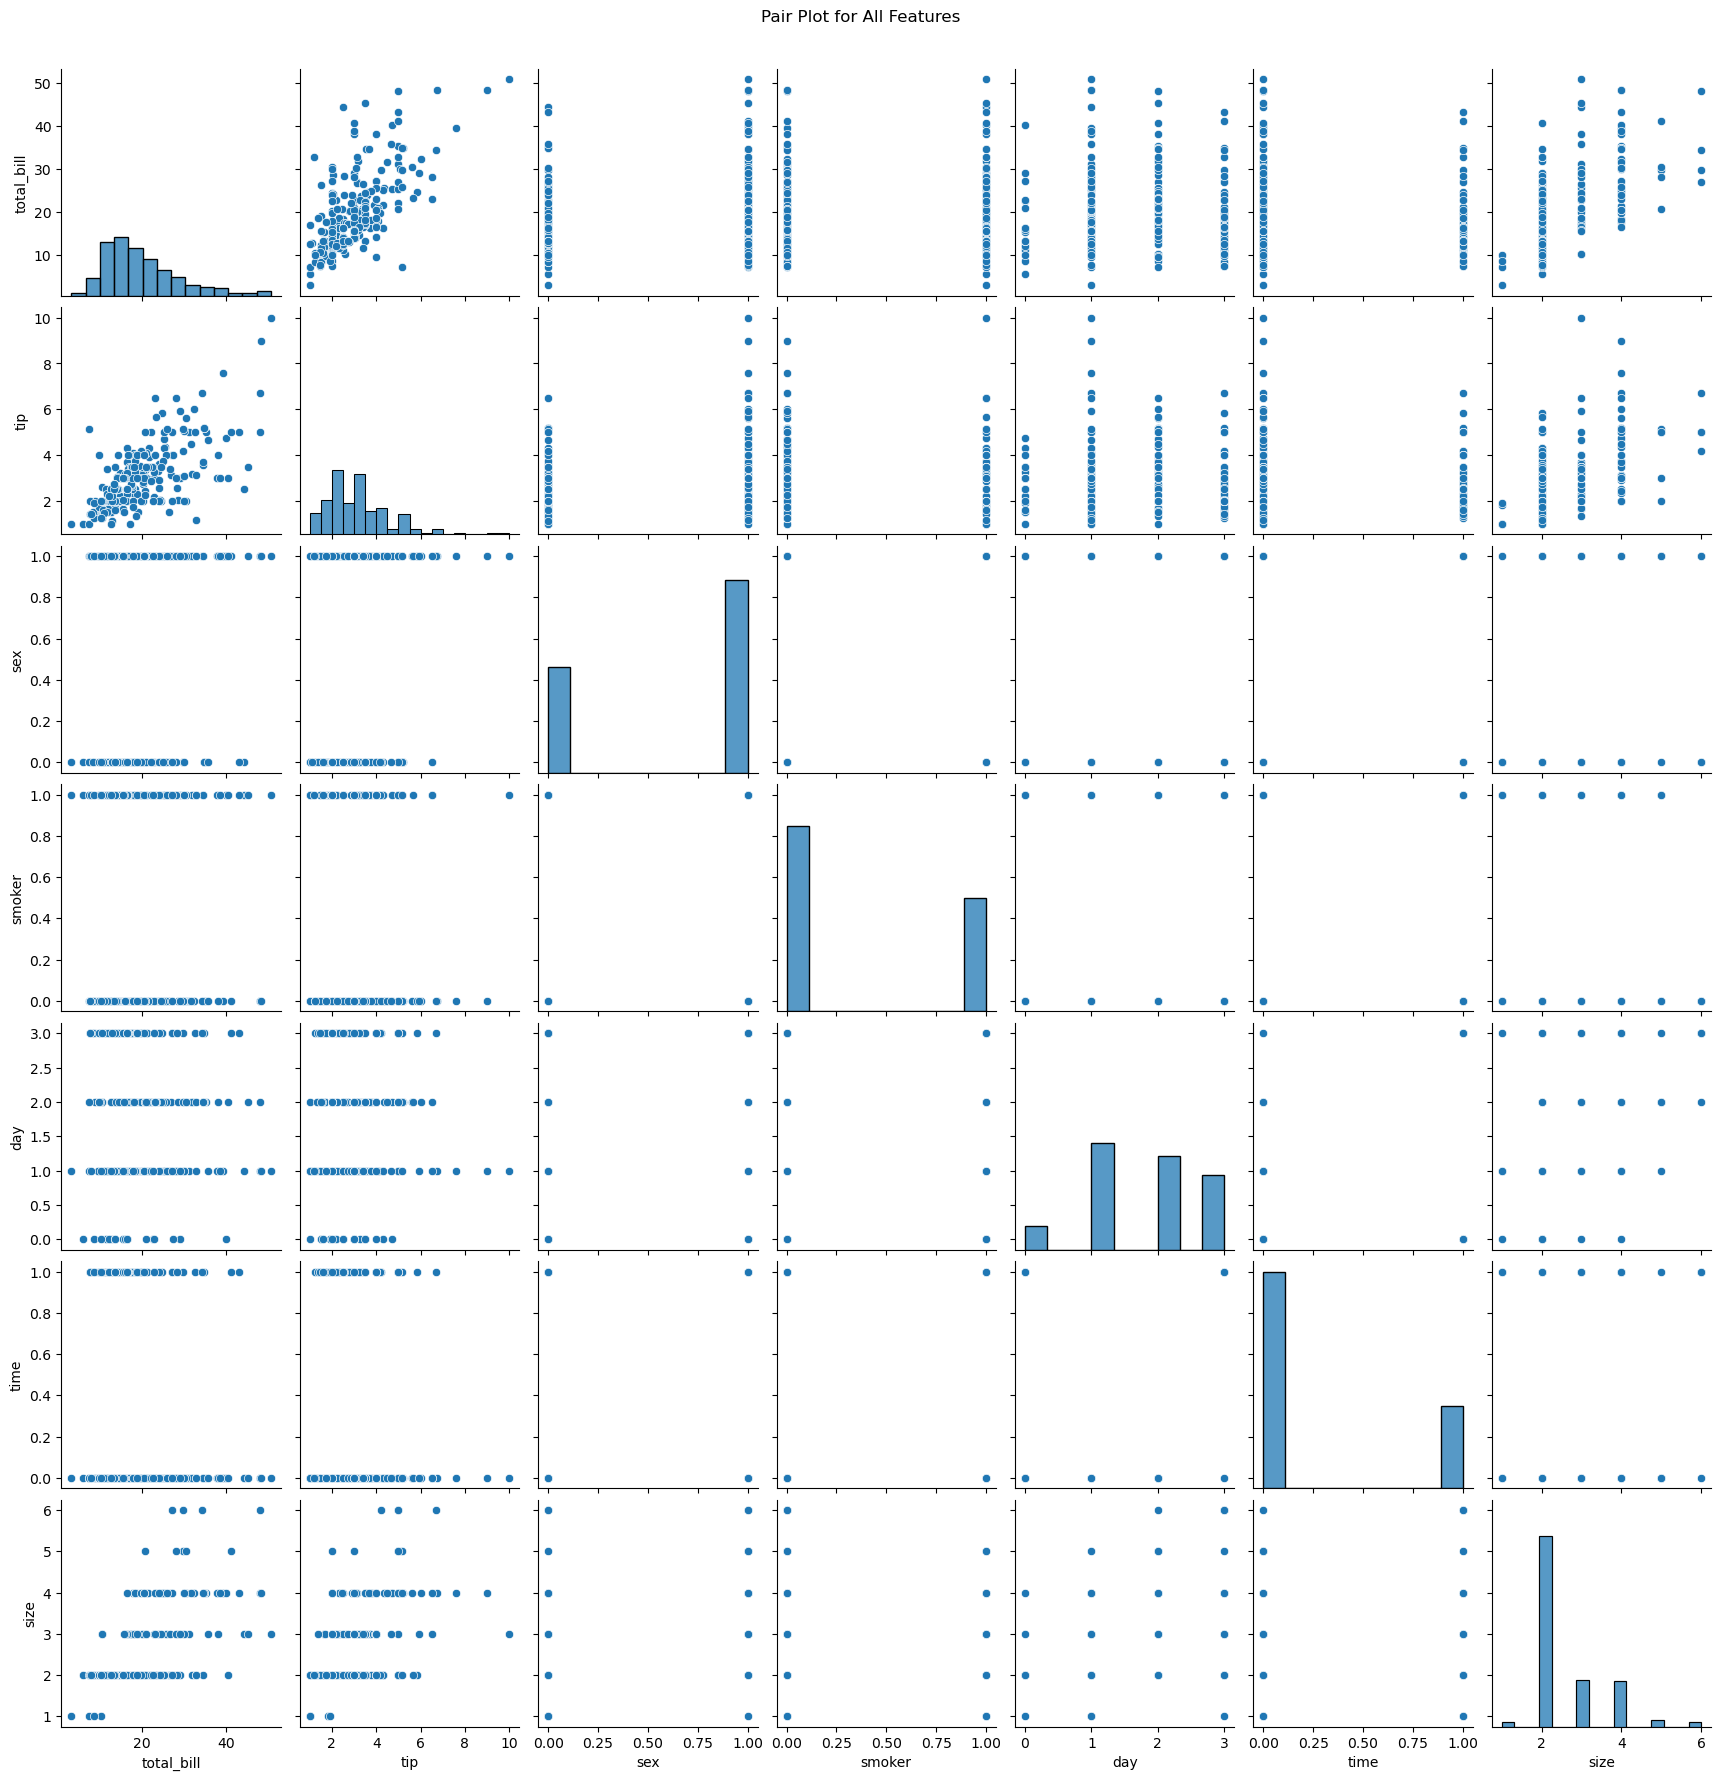

In [168]:
# Pair Plot for Multiple Features
plt.figure(figsize=(10, 8))
sns.pairplot(data)
plt.suptitle('Pair Plot for All Features', y=1.02)
plt.show()

The scatter plot shows a positive association between 'total_bill' and 'tip', indicating that as total bill amounts increase, tips also tend to rise, suggesting a linear trend.

Analysis :
- **Total Bill & Tip**: Positive correlation; higher bills generally lead to higher tips.
- **Size & Tip**: Slight positive trend; larger groups might give higher tips, but less consistent than with total_bill.
- **Gender**: No significant impact; tip distributions are similar for both male and female.
- **Smoking**: Minor difference in tip distributions; worth exploring but may have limited impact.
- **Day**: Tips are fairly uniform across days; day likely not a strong predictor.
- **Time**: Dinner tips vary more than lunch, suggesting time could be relevant.
- **Total Bill & Size**: Slight positive correlation; larger parties tend to have higher bills.

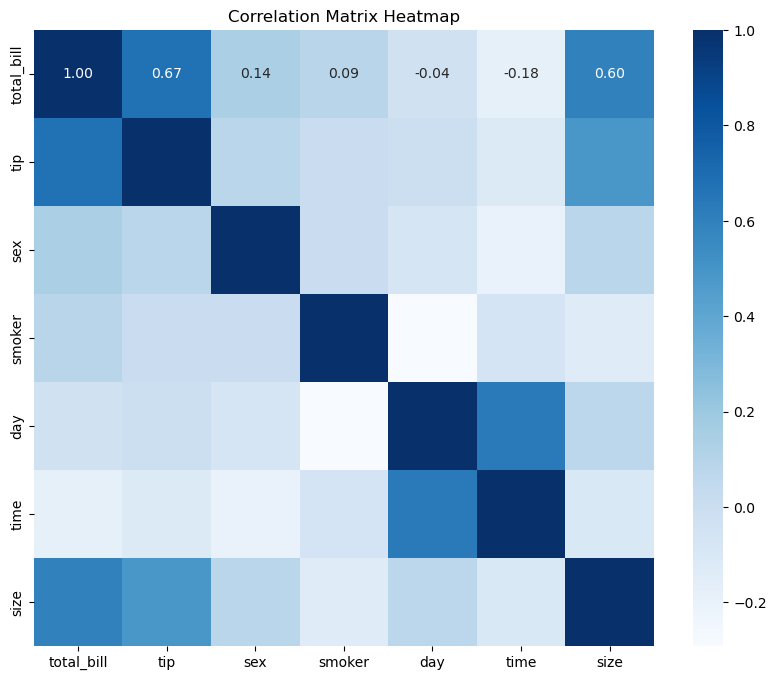

In [169]:
#  Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

The heatmap shows the correlation strength between features. 'total_bill' is strongly correlated with 'tip', while 'size' also shows some correlation. Other features have weaker correlations.

In [170]:
# Rainbow Test for Linearity
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = data['total_bill']  # Predictor variable
y = data['tip']         # Target variable
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

Rainbow Test Statistic: 1.3148004591106655
Rainbow Test p-value: 0.06745745436378922


In [171]:
# Line plot for time series data
df= pd.read_csv('tips (data for regression problem).csv')
df['day_numeric'] = df['day'].map({'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thur': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7})  # Aggregating tips by 'day'
df_sorted = df.sort_values(by='day_numeric')

# Summing total bill and tip amounts by day
df_grouped = df_sorted.groupby('day_numeric').agg({'total_bill': 'sum', 'tip': 'sum'}).reset_index()

df_grouped = df_grouped[df_grouped['total_bill'] > 0]

df_grouped

,day_numeric,total_bill,tip
0,4,1096.33,171.83
1,5,325.88,51.96
2,6,1778.40,260.40
3,7,1627.16,247.39


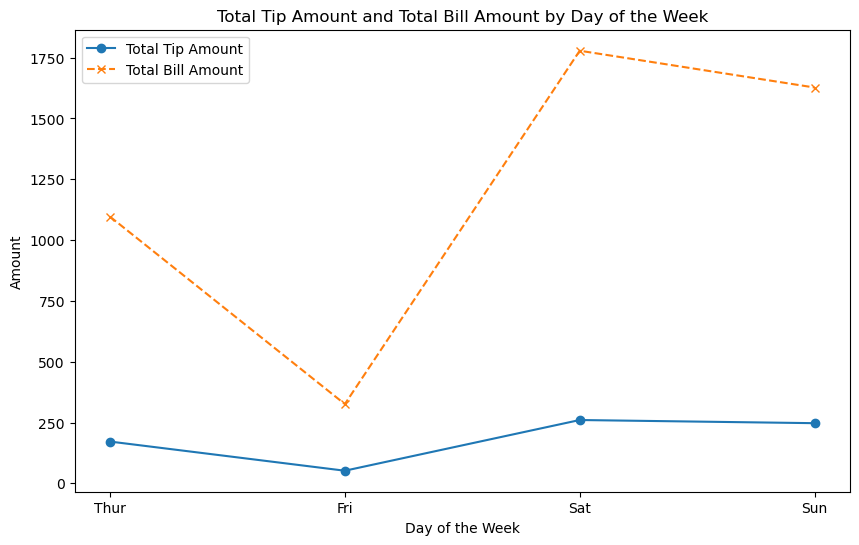

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['day_numeric'], df_grouped['tip'], marker='o', linestyle='-', label='Total Tip Amount')
plt.plot(df_grouped['day_numeric'], df_grouped['total_bill'], marker='x', linestyle='--', label='Total Bill Amount')

day_labels = ['Thur', 'Fri', 'Sat', 'Sun']
plt.xticks(df_grouped['day_numeric'], day_labels[:len(df_grouped)]) 

plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.title('Total Tip Amount and Total Bill Amount by Day of the Week')
plt.legend()
plt.show()

The line plot indicates that there is need to improve services on Friday to improve the tip rate.

In [173]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[['total_bill', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [174]:
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
Mean Absolute Error (MAE): 0.66
R-squared (R2): 0.48


In [175]:
#Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [176]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")


Ridge Regression Metrics:
MSE: 0.65, RMSE: 0.81, MAE: 0.66, R2: 0.48


In [177]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [178]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, MAE: {mae_lasso:.2f}, R2: {r2_lasso:.2f}")


Lasso Regression Metrics:
MSE: 0.64, RMSE: 0.80, MAE: 0.66, R2: 0.49


In [179]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.9)
elastic_reg.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [180]:
y_pred_elastic = elastic_reg.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nElastic Net Metrics:")
print(f"MSE: {mse_elastic:.2f}, RMSE: {rmse_elastic:.2f}, MAE: {mae_elastic:.2f}, R2: {r2_elastic:.2f}")


Elastic Net Metrics:
MSE: 0.62, RMSE: 0.78, MAE: 0.66, R2: 0.51


In [181]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [182]:
y_pred_tree = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Metrics:")
print(f"MSE: {mse_tree:.2f}, RMSE: {rmse_tree:.2f}, MAE: {mae_tree:.2f}, R2: {r2_tree:.2f}")



Decision Tree Regression Metrics:
MSE: 1.00, RMSE: 1.00, MAE: 0.82, R2: 0.20


In [183]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [184]:
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Metrics:")
print(f"MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Regression Metrics:
MSE: 0.83, RMSE: 0.91, MAE: 0.74, R2: 0.33


In [185]:
# Support Vector Regression(SVR)
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)


In [186]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression (SVR) Metrics:")
print(f"MSE: {mse_svr:.2f}, RMSE: {rmse_svr:.2f}, MAE: {mae_svr:.2f}, R2: {r2_svr:.2f}")


Support Vector Regression (SVR) Metrics:
MSE: 0.69, RMSE: 0.83, MAE: 0.67, R2: 0.45


In [187]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)


In [188]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN Regression Metrics:")
print(f"MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}, MAE: {mae_knn:.2f}, R2: {r2_knn:.2f}")


KNN Regression Metrics:
MSE: 0.67, RMSE: 0.82, MAE: 0.68, R2: 0.47


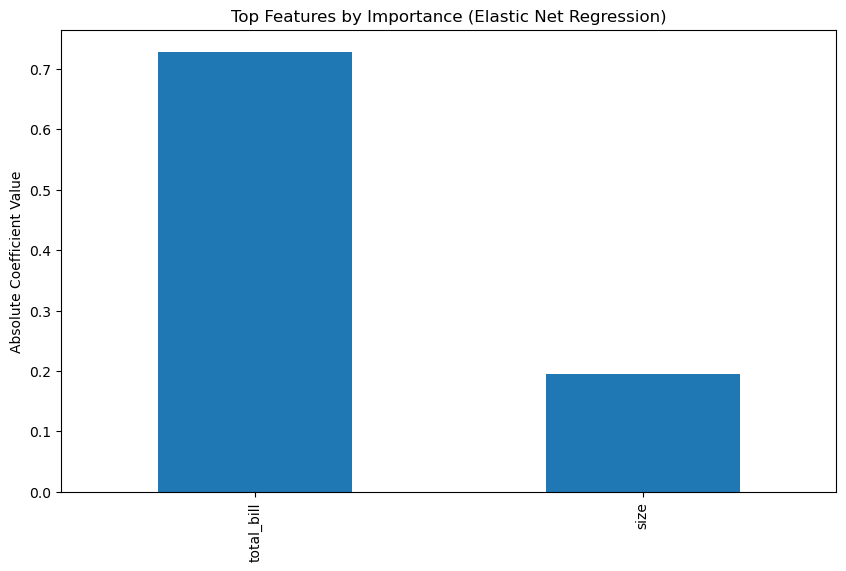


Feature Importance (Coefficients):
total_bill    0.728484
size          0.194366
dtype: float64


In [189]:
# Checking coefficients in Elastic Net model for feature importance
feature_importance = pd.Series(elastic_reg.coef_, index=X_train.columns)
sorted_importance = feature_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importance.head(10).plot(kind='bar')
plt.title('Top Features by Importance (Elastic Net Regression)')
plt.ylabel('Absolute Coefficient Value')
plt.show()

print("\nFeature Importance (Coefficients):")
print(sorted_importance)


It clearly shows that 'total_bill' has more influence over 'size' in predicting 'tip'.

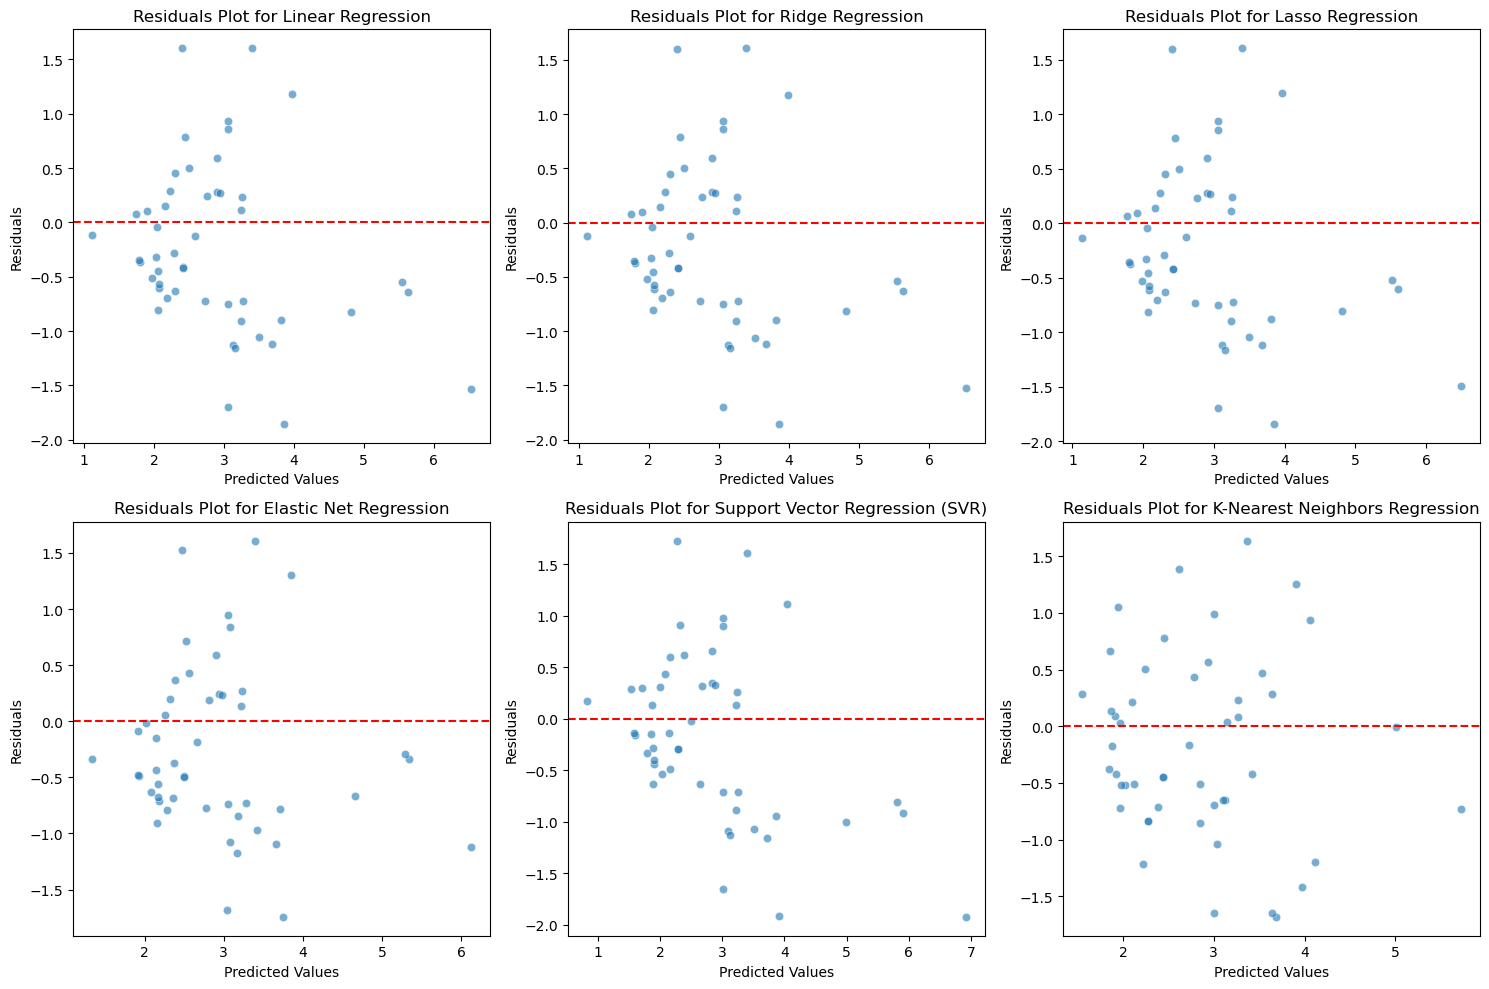

In [190]:
def plot_residuals_subplot(ax, y_test, y_pred, model_name):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")
    ax.set_title(f"Residuals Plot for {model_name}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  

# Linear Regression
y_pred_lr = lin_reg.predict(X_test_scaled) 
plot_residuals_subplot(axes[0], y_test, y_pred_lr, "Linear Regression")

# Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[1], y_test, y_pred_ridge, "Ridge Regression")

# Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test_scaled)
plot_residuals_subplot(axes[2], y_test, y_pred_lasso, "Lasso Regression")

# Elastic Net Regression
y_pred_elastic = elastic_reg.predict(X_test_scaled)
plot_residuals_subplot(axes[3], y_test, y_pred_elastic, "Elastic Net Regression")

# Support Vector Regression
y_pred_svr = svr_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[4], y_test, y_pred_svr, "Support Vector Regression (SVR)")

# K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test_scaled)  
plot_residuals_subplot(axes[5], y_test, y_pred_knn, "K-Nearest Neighbors Regression")

plt.tight_layout()
plt.show()


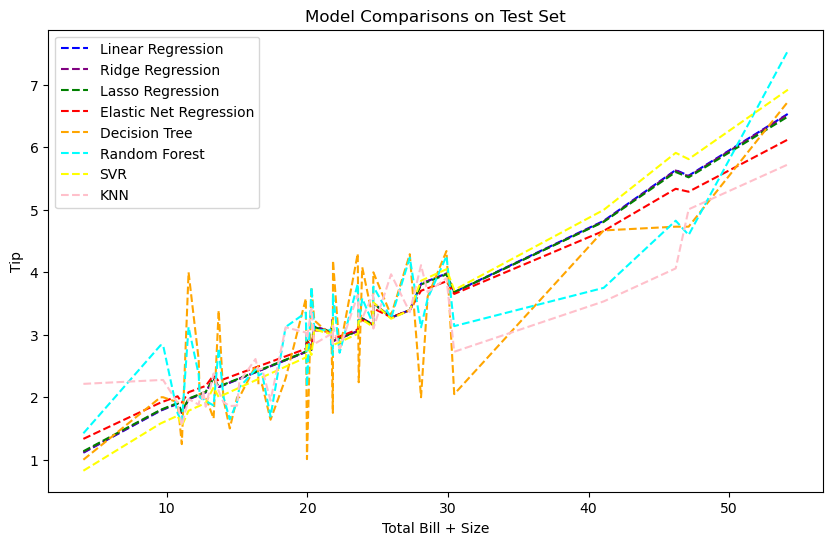

In [191]:
sorted_indices = np.argsort(X_test[['total_bill', 'size']].sum(axis=1))  # Sort based on total_bill + size
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

plt.figure(figsize=(10, 6))

plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_lr[sorted_indices], color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_ridge[sorted_indices], color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_lasso[sorted_indices], color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_elastic[sorted_indices], color='red', label='Elastic Net Regression', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_tree[sorted_indices], color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_rf[sorted_indices], color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_svr[sorted_indices], color='yellow', label='SVR', linestyle='--')
plt.plot(X_test_sorted[['total_bill', 'size']].sum(axis=1), y_pred_knn[sorted_indices], color='pink', label='KNN', linestyle='--')

plt.title('Model Comparisons on Test Set')
plt.xlabel('Total Bill + Size')
plt.ylabel('Tip')
plt.legend()
plt.show()


Conclusion:
- **Best Model**: Elastic Net Regression outperforms with the lowest MSE and highest R², balancing Ridge and Lasso regularization to handle correlated features and maintain sparsity, which enhances generalization on smaller datasets.
- **Linear Models**: Linear Regression, Ridge, and Lasso show moderate R² (0.48-0.49), indicating partial linearity in the data, with some variance explained by linear models.
- **Tree-Based Models**: Decision Tree and Random Forest tend to overfit on small datasets due to their flexibility, resulting in high MSE and low R², as they "memorize" rather than generalize data.

Insights for Management:
- Peak Times: Boost staffing and ambiance for dinners and weekends to increase bills and tips.
- Context Influence: Use promotions during weekday lunches to improve tips.
- Staff Training: Focus on quality service for high-tipping periods to raise tips and loyalty.
- Revenue: Offer high-margin items or promotions in low-tip periods to grow revenue.